<a href="https://colab.research.google.com/github/sgevatschnaider/machine-learning/blob/main/notebooks/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html

# =========================================================
# 1. BLOQUES HTML ESTÁTICOS (usar raw strings para preservar \)
# =========================================================

introduction_regression_html = r"""
<div class="content-block">
    <h2>Introducción al Concepto</h2>
    <p>La <strong>regresión lineal</strong> es uno de los algoritmos más simples y fundamentales en el campo del aprendizaje supervisado. Su objetivo principal es modelar la relación entre una variable dependiente (o respuesta) y una o más variables independientes (o predictoras) asumiendo una relación lineal.</p>
</div>
"""

conclusion_regression_html = r"""
<div class="content-block">
    <h2>En Resumen</h2>
    <p>La regresión lineal es una herramienta esencial para cualquier persona que se inicia en el análisis de datos y machine learning. Aporta interpretabilidad, facilidad de uso y una base sólida sobre la que se pueden construir modelos más complejos. Dominarla es el primer paso hacia una comprensión más profunda del modelado predictivo.</p>
</div>
"""

# =========================================================
# 2. DATOS PARA TARJETAS DESPLEGABLES (Contenido Principal)
# =========================================================
regression_cards_data = [
    {
        "titulo": r"1. ¿Qué es la Regresión Lineal?",
        "contenido": r"""
            <p>La regresión lineal intenta encontrar la función lineal que mejor se ajusta para predecir una variable continua \(y\) a partir de una o más variables de entrada \(x\).</p>
            <h4>Modelo de Regresión Lineal Simple</h4>
            <p>En su forma más básica, con una sola variable predictora, el modelo se expresa como:</p>
            <div class="formula-block">$$ y = \beta_0 + \beta_1 x + \epsilon $$</div>
            <p>Donde los componentes son:</p>
            <ul>
                <li>\(y\): La variable dependiente o respuesta que queremos predecir.</li>
                <li>\(x\): La variable independiente o predictora.</li>
                <li>\(\beta_0\): El <strong>intercepto</strong> (o sesgo), que es el valor de \(y\) cuando \(x=0\).</li>
                <li>\(\beta_1\): El <strong>coeficiente</strong> de la variable predictora, que representa el cambio en \(y\) por cada unidad de cambio en \(x\).</li>
                <li>\(\epsilon\): El <strong>término de error</strong>, que captura la variabilidad en \(y\) que no puede ser explicada por el modelo lineal.</li>
            </ul>
        """
    },
    {
        "titulo": r"2. Tipos de Regresión Lineal",
        "contenido": r"""
            <h4>Regresión Lineal Simple</h4>
            <p>Involucra una única variable independiente para predecir la variable dependiente. Es el modelo ideal para entender los fundamentos de la relación entre dos variables continuas.</p>
            <blockquote>Ejemplo: Predecir el peso de una persona (\(y\)) basándose únicamente en su altura (\(x\)).</blockquote>
            <h4>Regresión Lineal Múltiple</h4>
            <p>Utiliza dos o más variables independientes para predecir la variable dependiente. Permite modelar relaciones más complejas y realistas.</p>
            <div class="formula-block">$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon $$</div>
            <blockquote>Ejemplo: Predecir el precio de una casa (\(y\)) basándose en su superficie (\(x_1\)), número de habitaciones (\(x_2\)) y antigüedad (\(x_3\)).</blockquote>
        """
    },
    {
        "titulo": r"3. Supuestos Clave del Modelo",
        "contenido": r"""
            <p>Para que un modelo de regresión lineal sea considerado válido y fiable (BLUE: Best Linear Unbiased Estimator), debe cumplir con los siguientes supuestos:</p>
            <ol>
                <li><strong>Linealidad:</strong> La relación entre las variables independientes y la variable dependiente debe ser lineal. Se puede verificar visualmente con diagramas de dispersión.</li>
                <li><strong>Independencia:</strong> Las observaciones (y sus errores) deben ser independientes entre sí. Es especialmente importante en datos de series temporales, donde puede existir autocorrelación.</li>
                <li><strong>Homocedasticidad:</strong> La varianza de los errores debe ser constante para todos los niveles de las variables independientes. La violación de este supuesto (heterocedasticidad) puede sesgar las estimaciones de los coeficientes.</li>
                <li><strong>Normalidad de los Errores:</strong> Los errores del modelo deben seguir una distribución normal. Esto es crucial para la validez de los intervalos de confianza y las pruebas de hipótesis.</li>
                <li><strong>No Multicolinealidad:</strong> En la regresión múltiple, las variables independientes no deben estar altamente correlacionadas entre sí.</li>
            </ol>
        """
    },
    {
        "titulo": r"4. Evaluación del Modelo",
        "contenido": r"""
            <p>Una vez entrenado el modelo, es fundamental evaluar su rendimiento. Las métricas principales son:</p>
            <div class="table-container">
                 <table>
                    <thead><tr><th>Métrica</th><th>Descripción</th><th>Interpretación</th></tr></thead>
                    <tbody>
                        <tr><td><strong>R-cuadrado (\(R^2\))</strong></td><td>Proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.</td><td>Un valor cercano a 1 indica un buen ajuste; cercano a 0, un mal ajuste.</td></tr>
                        <tr><td><strong>Error Cuadrático Medio (MSE)</strong></td><td>Promedio de los errores al cuadrado. Penaliza más los errores grandes.</td><td>Cuanto más bajo, mejor. Es sensible a outliers.</td></tr>
                        <tr><td><strong>Raíz del Error Cuadrático Medio (RMSE)</strong></td><td>Raíz cuadrada del MSE. Está en las mismas unidades que la variable de respuesta.</td><td>Cuanto más bajo, mejor. Es más interpretable que el MSE.</td></tr>
                        <tr><td><strong>Error Absoluto Medio (MAE)</strong></td><td>Promedio de los valores absolutos de los errores.</td><td>Cuanto más bajo, mejor. Es menos sensible a outliers que el MSE/RMSE.</td></tr>
                    </tbody>
                </table>
            </div>
        """
    },
    {
        "titulo": r"5. Implementación en Python (scikit-learn)",
        "contenido": r"""
            <p>La librería <code>scikit-learn</code> ofrece una implementación sencilla y potente del modelo de regresión lineal.</p>
            <div class="code-block">
<pre><code><span class="comment"># 1. Importar las librerías necesarias</span>
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

<span class="comment"># 2. Crear datos de ejemplo</span>
data = {'variable_independiente': np.arange(20),
        'variable_dependiente': 2.5 * np.arange(20) + np.random.randn(20) * 5}
df = pd.DataFrame(data)

X = df[['variable_independiente']]  <span class="comment"># Predictor (debe ser 2D)</span>
y = df['variable_dependiente']      <span class="comment"># Respuesta</span>

<span class="comment"># 3. Dividir los datos en entrenamiento y prueba</span>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<span class="comment"># 4. Crear y entrenar el modelo</span>
modelo = LinearRegression()
modelo.fit(X_train, y_train)

<span class="comment"># 5. Realizar predicciones</span>
y_pred = modelo.predict(X_test)

<span class="comment"># 6. Evaluar el modelo</span>
print(f"Coeficiente (β1): {modelo.coef_[0]:.2f}")
print(f"Intercepto (β0): {modelo.intercept_:.2f}")
print(f"R² (test): {r2_score(y_test, y_pred):.2f}")
print(f"MSE (test): {mean_squared_error(y_test, y_pred):.2f}")</code></pre>
            </div>
        """
    },
    {
        "titulo": r"6. Aplicaciones Prácticas y Limitaciones",
        "contenido": r"""
            <h4>Casos de Uso Comunes</h4>
            <ul>
                <li><strong>Economía y Finanzas:</strong> Predecir el precio de acciones, analizar el impacto del PIB en el desempleo, estimar el valor de una vivienda.</li>
                <li><strong>Ciencias de la Salud:</strong> Modelar la relación entre la dosis de un medicamento y la presión arterial, predecir el riesgo de enfermedad basado en factores de estilo de vida.</li>
                <li><strong>Marketing:</strong> Evaluar el impacto del gasto en publicidad sobre las ventas, predecir el valor de vida de un cliente (Customer Lifetime Value).</li>
                <li><strong>Ciencias Sociales:</strong> Estudiar el efecto de la educación en los ingresos.</li>
            </ul>
            <h4>Limitaciones Importantes</h4>
            <ul>
                <li><strong>Supuesto de Linealidad:</strong> Su principal debilidad es que no puede capturar relaciones no lineales entre variables. Si la relación real es una curva, la línea recta será un mal modelo.</li>
                <li><strong>Sensibilidad a Outliers:</strong> Los valores atípicos pueden tener una influencia desproporcionada en la estimación de los coeficientes, desviando significativamente la línea de regresión.</li>
                <li><strong>Independencia de Predictoras:</strong> Asume que las variables predictoras no están altamente correlacionadas (multicolinealidad), lo cual puede desestabilizar las estimaciones de los coeficientes.</li>
            </ul>
        """
    }
]

# =========================================================
# 3. GENERADOR DE TARJETAS (Función reutilizada)
# =========================================================
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_html = seccion['titulo']
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_html}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

contenido_dinamico_html = generar_tarjetas_definiciones(regression_cards_data)

# =========================================================
# 4. PLANTILLA GLOBAL (con estilo para bloques de código)
# =========================================================
plantilla_profesional = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <script>
    window.MathJax = {{
      tex: {{
        inlineMath: [['$', '$'], ['\\(', '\\)']],
        displayMath: [['$$', '$$'], ['\\[', '\\]']],
        processEscapes: true,
        processEnvironments: true
      }},
      svg: {{
        fontCache: 'global'
      }}
    }};
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #0072ff 0%, #00c6ff 100%);
      --bg-secondary: rgba(255, 255, 255, 0.9);
      --bg-tertiary: rgba(248, 250, 252, 0.95);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --text-light: #ffffff;
      --accent-primary: #0072ff;
      --accent-secondary: #00c6ff;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(226, 232, 240, 0.9);
      --shadow-card: 0 15px 35px rgba(45, 55, 72, 0.1);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
      --code-bg: #f8f9fa;
      --code-text: #212529;
      --code-comment: #6c757d;
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #141e30 0%, #243b55 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.8);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --accent-primary: #3b82f6;
      --accent-secondary: #60a5fa;
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.2);
      --code-bg: #1a202c;
      --code-text: #e2e8f0;
      --code-comment: #a0aec0;
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; text-shadow: 0 0 30px rgba(255,255,255,0.3); margin-bottom: 1rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .content-block {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); padding: 2rem; margin-bottom: 2rem; }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1.5rem; border-bottom: 2px solid var(--accent-primary); padding-bottom: 0.5rem; }}
    .content-block p, .content-block li {{ color: var(--text-secondary); margin-bottom: 1rem; }}
    .content-block ul {{ list-style-type: '→ '; padding-left: 20px; }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.4rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent-primary); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s cubic-bezier(0.25, 0.8, 0.25, 1), padding 1.2s cubic-bezier(0.25, 0.8, 0.25, 1); background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 1rem; font-size: 1.2rem; border-left: 4px solid var(--accent-primary); padding-left: 1rem; }}
    .topic-content h4:first-child {{ margin-top: 0; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content ol li::marker {{ font-weight: bold; color: var(--accent-primary); }}
    .topic-content ul li::marker {{ color: var(--accent-primary); }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content em {{ color: var(--text-primary); font-style: italic; }}
    .topic-content blockquote {{ border-left: 4px solid var(--accent-secondary); padding-left: 1.5rem; margin: 1.5rem 0; font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; padding: 1rem 1.5rem; }}
    .formula-block {{ padding: 1.5rem; background: rgba(44, 62, 80, 0.05); border-radius: 10px; text-align: center; overflow-x: auto; margin: 1.5rem 0; color: var(--text-primary); border: 1px solid var(--border-color); }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; border: 1px solid var(--border-color); border-radius: 10px; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 14px 18px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; border-top: 0; }}
    tbody tr:nth-child(even) {{ background: rgba(127, 140, 141, 0.03); }}
    .MathJax {{ color: var(--text-primary) !important; }}

    .code-block pre {{ background-color: var(--code-bg); color: var(--code-text); padding: 1.5rem; border-radius: 10px; overflow-x: auto; font-family: 'JetBrains Mono', monospace; font-size: 0.95em; margin: 1.5rem 0; border: 1px solid var(--border-color);}}
    .code-block pre code .comment {{ color: var(--code-comment); font-style: italic; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    {introduction_html}
    <div class="lesson-container">
        {dynamic_content_html}
    </div>
    {conclusion_html}
    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {{ bodyEl.setAttribute('data-theme', theme); localStorage.setItem('theme', theme); if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }} }}
        themeToggleButton.addEventListener('click', () => {{ const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark'; setTheme(newTheme); }});
        setTheme(localStorage.getItem('theme') || 'dark');
        document.querySelectorAll('.topic-header').forEach(header => {{ header.addEventListener('click', () => {{ const card = header.parentElement; card.classList.toggle('open'); if (window.MathJax) {{ window.MathJax.typesetPromise([card]).catch(err => console.log('MathJax error:', err)); }} }}); }});
        const container = document.getElementById('particles-container');
        if (container) {{ for (let i = 0; i < 30; i++) {{ const p = document.createElement('div'); p.className = 'particle'; p.style.left = Math.random() * 100 + 'vw'; const size = (Math.random() * 5 + 2); p.style.width = size + 'px'; p.style.height = size + 'px'; p.style.animationDelay = Math.random() * -20 + 's'; p.style.animationDuration = (15 + Math.random() * 10) + 's'; p.style.opacity = 0.6; container.appendChild(p); }} }}
        const typesetInitialContent = () => {{ if (window.MathJax) {{ window.MathJax.typesetPromise().catch(err => console.log('Initial MathJax error:', err)); }} }};
        if (document.readyState === 'complete') {{ typesetInitialContent(); }} else {{ window.addEventListener('load', typesetInitialContent); }}
    }})();
  </script>
</body>
</html>
"""

# =========================================================
# 5. RENDER FINAL
# =========================================================
final_html = plantilla_profesional.format(
    main_title="Regresión Lineal: Fundamentos y Aplicaciones",
    introduction_html=introduction_regression_html,
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_regression_html,
    footer_text="Material interactivo de Machine Learning. Elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

Métrica,Descripción,Interpretación
R-cuadrado (\(R^2\)),Proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.,"Un valor cercano a 1 indica un buen ajuste; cercano a 0, un mal ajuste."
Error Cuadrático Medio (MSE),Promedio de los errores al cuadrado. Penaliza más los errores grandes.,"Cuanto más bajo, mejor. Es sensible a outliers."
Raíz del Error Cuadrático Medio (RMSE),Raíz cuadrada del MSE. Está en las mismas unidades que la variable de respuesta.,"Cuanto más bajo, mejor. Es más interpretable que el MSE."
Error Absoluto Medio (MAE),Promedio de los valores absolutos de los errores.,"Cuanto más bajo, mejor. Es menos sensible a outliers que el MSE/RMSE."


In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html

# =========================================================
# 1. BLOQUES HTML ESTÁTICOS
# =========================================================

introduction_california_html = r"""
<div class="content-block">
    <h2>Análisis del Dataset: California Housing</h2>
    <p>El dataset <strong>fetch_california_housing</strong> es un conjunto de datos clásico incluido en scikit-learn, ampliamente utilizado para practicar y evaluar algoritmos de regresión supervisada. Está basado en datos del censo de California de 1990 y su objetivo es predecir el valor medio de las viviendas en distintas zonas (bloques censales) del estado.</p>
</div>
"""

conclusion_california_html = r"""
<div class="content-block">
    <h2>Conclusión</h2>
    <p>En resumen, el dataset California Housing es una herramienta estándar y fundamental para cualquier practicante de Machine Learning. Su riqueza de características, tamaño manejable y objetivo claro lo convierten en el punto de partida ideal para entrenar, evaluar y comparar modelos de regresión, desde una simple regresión lineal hasta algoritmos más avanzados como Gradient Boosting o redes neuronales.</p>
</div>
"""

# =========================================================
# 2. DATOS PARA TARJETAS DESPLEGABLES
# =========================================================
california_housing_cards_data = [
    {
        "titulo": r"1. Objetivo Principal y Variable Target",
        "contenido": r"""
            <h4>Meta del Modelo Predictivo</h4>
            <p>El objetivo principal es predecir el precio medio de las viviendas en distintas áreas geográficas de California a partir de un conjunto de características demográficas y socioeconómicas de cada zona.</p>
            <h4>Variable Objetivo (Target)</h4>
            <p>La variable que se busca predecir es <strong>MedHouseVal</strong>:</p>
            <ul>
                <li><strong>Descripción:</strong> Valor medio de las casas en un bloque censal.</li>
                <li><strong>Unidades:</strong> La variable está escalada en centenas de miles de dólares ($100,000). Por ejemplo, un valor de <code>2.45</code> en el dataset representa un precio medio de <strong>$245,000</strong>.</li>
            </ul>
        """
    },
    {
        "titulo": r"2. Descripción de las Variables (Features)",
        "contenido": r"""
            <p>El dataset contiene 8 características numéricas que sirven como predictores:</p>
            <div class="table-container">
                 <table>
                    <thead>
                        <tr>
                            <th>Variable</th>
                            <th>Descripción</th>
                            <th>Tipo</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                            <td><strong>MedInc</strong></td>
                            <td>Ingreso medio de los hogares en la zona (en decenas de miles de dólares)</td>
                            <td>Continua</td>
                        </tr>
                        <tr>
                            <td><strong>HouseAge</strong></td>
                            <td>Edad media de las viviendas en la zona (en años)</td>
                            <td>Continua</td>
                        </tr>
                        <tr>
                            <td><strong>AveRooms</strong></td>
                            <td>Promedio de cuartos por hogar</td>
                            <td>Continua</td>
                        </tr>
                        <tr>
                            <td><strong>AveBedrms</strong></td>
                            <td>Promedio de dormitorios por hogar</td>
                            <td>Continua</td>
                        </tr>
                        <tr>
                            <td><strong>Population</strong></td>
                            <td>Población total en el bloque censal</td>
                            <td>Continua</td>
                        </tr>
                        <tr>
                            <td><strong>AveOccup</strong></td>
                            <td>Promedio de ocupantes por hogar</td>
                            <td>Continua</td>
                        </tr>
                        <tr>
                            <td><strong>Latitude</strong></td>
                            <td>Latitud geográfica del centro del bloque censal</td>
                            <td>Continua</td>
                        </tr>
                        <tr>
                            <td><strong>Longitude</strong></td>
                            <td>Longitud geográfica del centro del bloque censal</td>
                            <td>Continua</td>
                        </tr>
                    </tbody>
                </table>
            </div>
        """
    },
    {
        "titulo": r"3. Características Técnicas y Origen",
        "contenido": r"""
            <p>A continuación se detallan las propiedades técnicas del conjunto de datos.</p>
            <ul>
                <li><strong>Número de Muestras:</strong> 20,640 (cada una representa un bloque censal).</li>
                <li><strong>Número de Características (Features):</strong> 8 predictoras numéricas.</li>
                <li><strong>Valores Faltantes:</strong> No contiene valores nulos, está listo para ser utilizado.</li>
                <li><strong>Tamaño Aproximado en Memoria:</strong> ~1.6 MB.</li>
                <li><strong>Fuente Original:</strong> Derivado del Censo de EE.UU. de 1990 (Pace, R. Kelley, and Ronald Barry, "Sparse Spatial Autoregressions," Statistics and Probability Letters, 33 (1997) 291-297).</li>
            </ul>
        """
    },
    {
        "titulo": r"4. Ejemplo de Uso en Python",
        "contenido": r"""
            <p>Cargar y explorar este dataset con <code>scikit-learn</code> y <code>pandas</code> es muy sencillo.</p>
            <div class="code-block">
<pre><code><span class="comment"># 1. Importar las librerías necesarias</span>
from sklearn.datasets import fetch_california_housing
import pandas as pd

<span class="comment"># 2. Cargar el dataset como un objeto Bunch de scikit-learn</span>
california_bunch = fetch_california_housing()

<span class="comment"># 3. Crear un DataFrame de pandas con las características (X)</span>
<span class="comment"># Se usan los nombres de las features provistos en el objeto</span>
X = pd.DataFrame(california_bunch.data, columns=california_bunch.feature_names)

<span class="comment"># 4. Crear una Serie de pandas con la variable objetivo (y)</span>
y = pd.Series(california_bunch.target, name='MedHouseVal')

<span class="comment"># 5. Unir X e y para una exploración completa y mostrar las primeras 5 filas</span>
df_full = X.join(y)
print("Dimensiones del DataFrame:", df_full.shape)
print("\nPrimeras 5 filas del dataset:")
print(df_full.head())
</code></pre>
            </div>
        """
    }
]

# =========================================================
# 3. GENERADOR DE TARJETAS
# =========================================================
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_html = seccion['titulo']
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_html}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

contenido_dinamico_html = generar_tarjetas_definiciones(california_housing_cards_data)

# =========================================================
# 4. PLANTILLA GLOBAL PROFESIONAL
# =========================================================
plantilla_profesional = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <script>
    window.MathJax = {{ tex: {{ inlineMath: [['$', '$']], displayMath: [['$$', '$$']] }} }};
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #f8c500 0%, #fb923c 100%);
      --bg-secondary: rgba(255, 255, 255, 0.9);
      --bg-tertiary: rgba(255, 253, 248, 0.95);
      --text-primary: #3d2c00;
      --text-secondary: #5c4510;
      --text-light: #ffffff;
      --accent-primary: #f59e0b;
      --accent-secondary: #f8c500;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(226, 232, 240, 0.9);
      --shadow-card: 0 15px 35px rgba(45, 55, 72, 0.1);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
      --code-bg: #fffbeb;
      --code-text: #3d2c00;
      --code-comment: #92400e;
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #1f2937 0%, #374151 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.8);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --accent-primary: #f59e0b;
      --accent-secondary: #fcd34d;
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.2);
      --code-bg: #1a202c;
      --code-text: #e2e8f0;
      --code-comment: #a0aec0;
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; text-shadow: 0 0 30px rgba(255,255,255,0.3); margin-bottom: 1rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .content-block {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); padding: 2rem; margin-bottom: 2rem; }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1.5rem; border-bottom: 2px solid var(--accent-primary); padding-bottom: 0.5rem; }}
    .content-block p, .content-block li {{ color: var(--text-secondary); margin-bottom: 1rem; }}
    .content-block ul {{ list-style-type: '→ '; padding-left: 20px; }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.4rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent-primary); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s cubic-bezier(0.25, 0.8, 0.25, 1), padding 1.2s cubic-bezier(0.25, 0.8, 0.25, 1); background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 1rem; font-size: 1.2rem; border-left: 4px solid var(--accent-primary); padding-left: 1rem; }}
    .topic-content h4:first-child {{ margin-top: 0; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content ul li::marker {{ color: var(--accent-primary); }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}

    .table-container {{ overflow-x: auto; margin: 1.5rem 0; border: 1px solid var(--border-color); border-radius: 10px; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 14px 18px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; border-top: 0; }}
    tbody tr:nth-child(even) {{ background: rgba(127, 140, 141, 0.03); }}

    .code-block pre {{ background-color: var(--code-bg); color: var(--code-text); padding: 1.5rem; border-radius: 10px; overflow-x: auto; font-family: 'JetBrains Mono', monospace; font-size: 0.95em; margin: 1.5rem 0; border: 1px solid var(--border-color);}}
    .code-block pre code .comment {{ color: var(--code-comment); font-style: italic; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    {introduction_html}
    <div class="lesson-container">
        {dynamic_content_html}
    </div>
    {conclusion_html}
    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>
  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {{ bodyEl.setAttribute('data-theme', theme); localStorage.setItem('theme', theme); if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }} }}
        themeToggleButton.addEventListener('click', () => {{ const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark'; setTheme(newTheme); }});
        setTheme(localStorage.getItem('theme') || 'dark');
        document.querySelectorAll('.topic-header').forEach(header => {{ header.addEventListener('click', () => {{ const card = header.parentElement; card.classList.toggle('open'); }}); }});
        const container = document.getElementById('particles-container');
        if (container) {{ for (let i = 0; i < 30; i++) {{ const p = document.createElement('div'); p.className = 'particle'; p.style.left = Math.random() * 100 + 'vw'; const size = (Math.random() * 5 + 2); p.style.width = size + 'px'; p.style.height = size + 'px'; p.style.animationDelay = Math.random() * -20 + 's'; p.style.animationDuration = (15 + Math.random() * 10) + 's'; p.style.opacity = 0.6; container.appendChild(p); }} }}
    }})();
  </script>
</body>
</html>
"""

# =========================================================
# 5. RENDER FINAL
# =========================================================
final_html = plantilla_profesional.format(
    main_title="Dataset: California Housing",
    introduction_html=introduction_california_html,
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_california_html,
    footer_text="Análisis interactivo de datasets para Machine Learning."
)

display(HTML(final_html))

Variable,Descripción,Tipo
MedInc,Ingreso medio de los hogares en la zona (en decenas de miles de dólares),Continua
HouseAge,Edad media de las viviendas en la zona (en años),Continua
AveRooms,Promedio de cuartos por hogar,Continua
AveBedrms,Promedio de dormitorios por hogar,Continua
Population,Población total en el bloque censal,Continua
AveOccup,Promedio de ocupantes por hogar,Continua
Latitude,Latitud geográfica del centro del bloque censal,Continua
Longitude,Longitud geográfica del centro del bloque censal,Continua


 Dimensión del dataset: (20640, 8)

 Descripción breve de las variables:


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000



 Correlación de cada feature con el precio medio de la vivienda:


,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


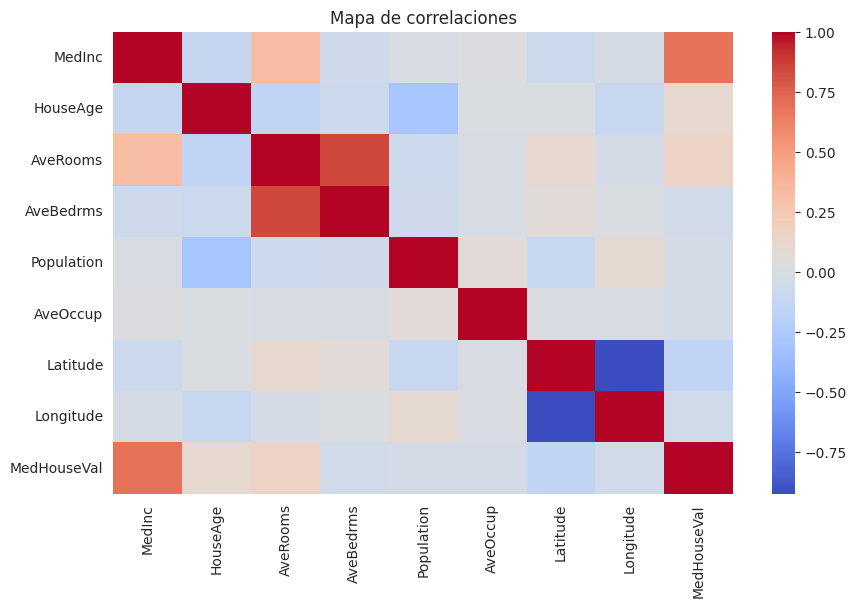

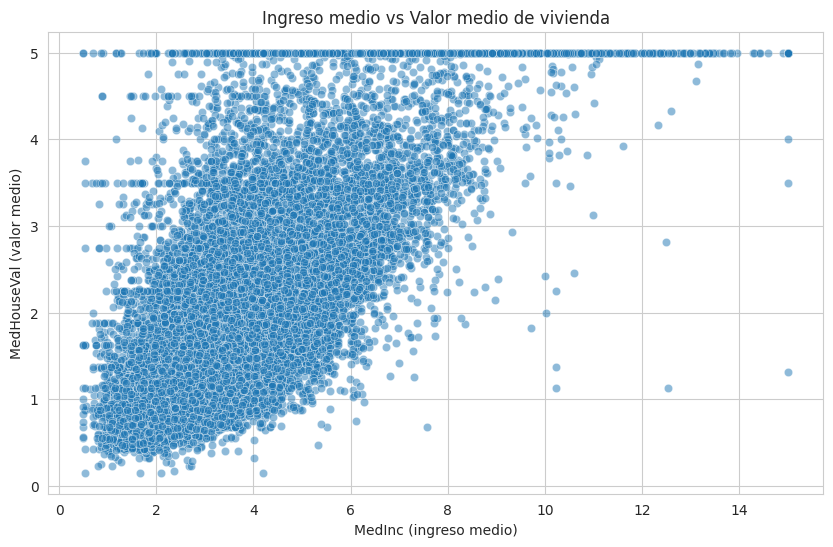


📊 Métricas en el conjunto de prueba:
   ▸ R² ...............: 0.576
   ▸ MAE ..............: 0.533
   ▸ RMSE .............: 0.746
   ▸ MSE ..............: 0.556

 R² por fold de validación cruzada (10-fold):
[0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]
   ▸ Promedio R² CV ...: 0.511 ± 0.059


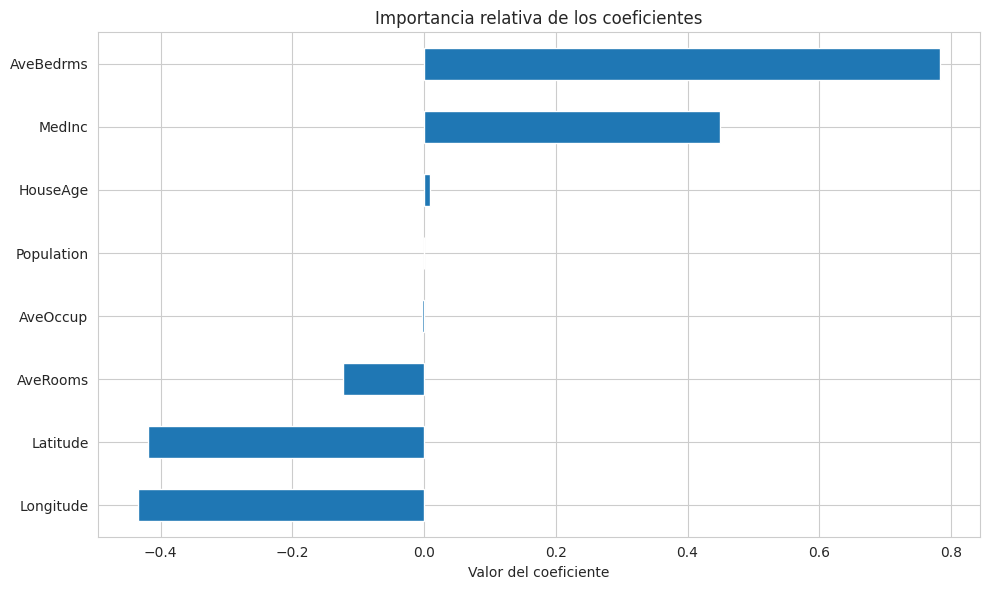

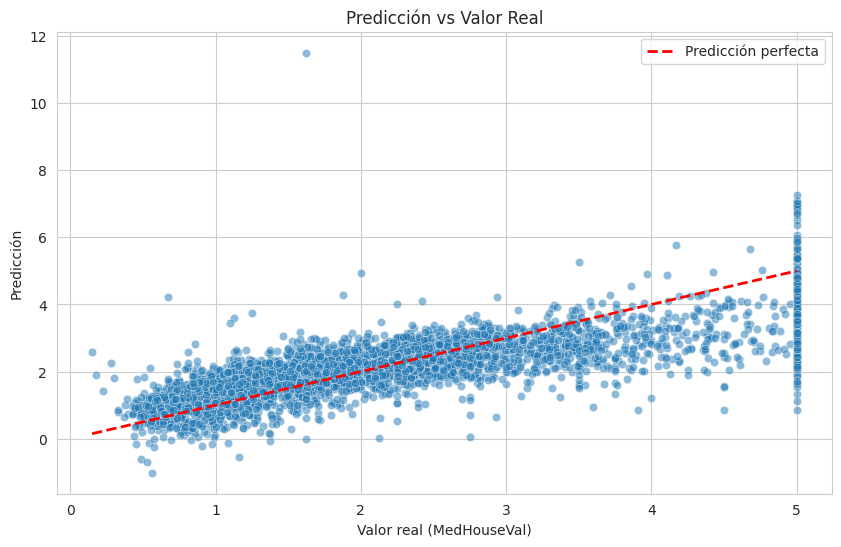

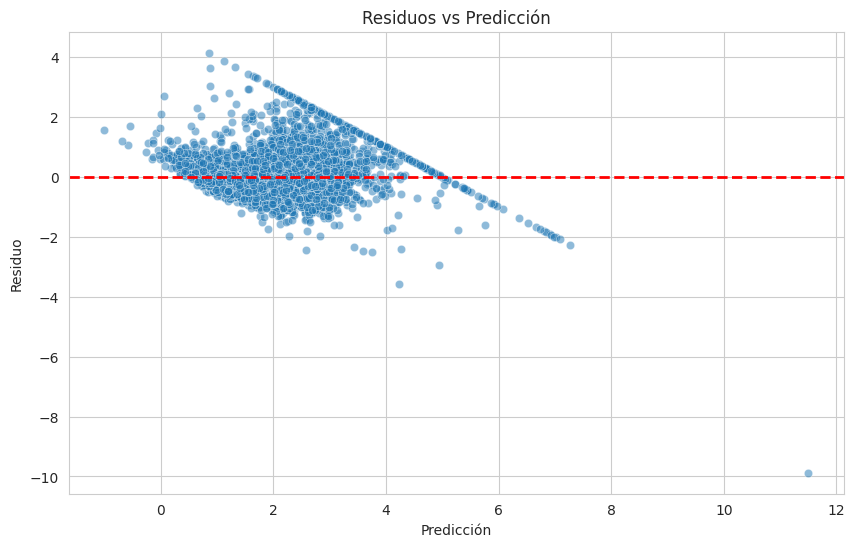

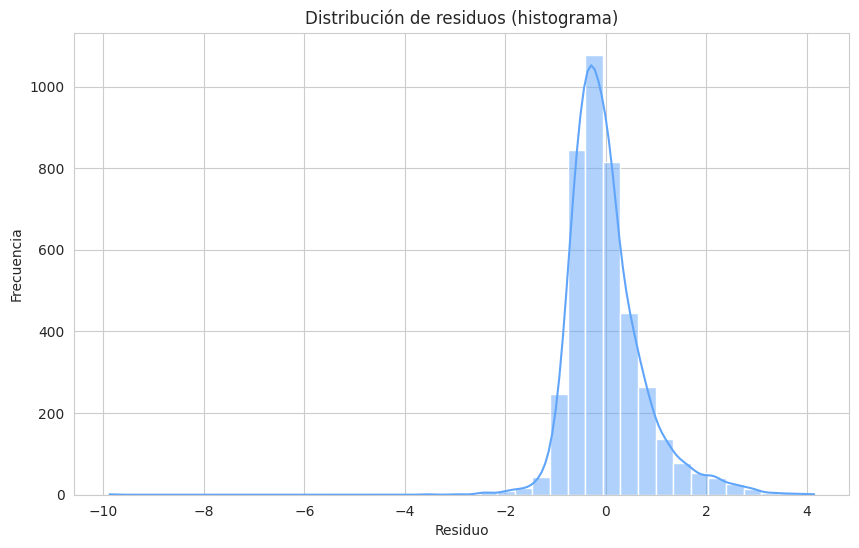

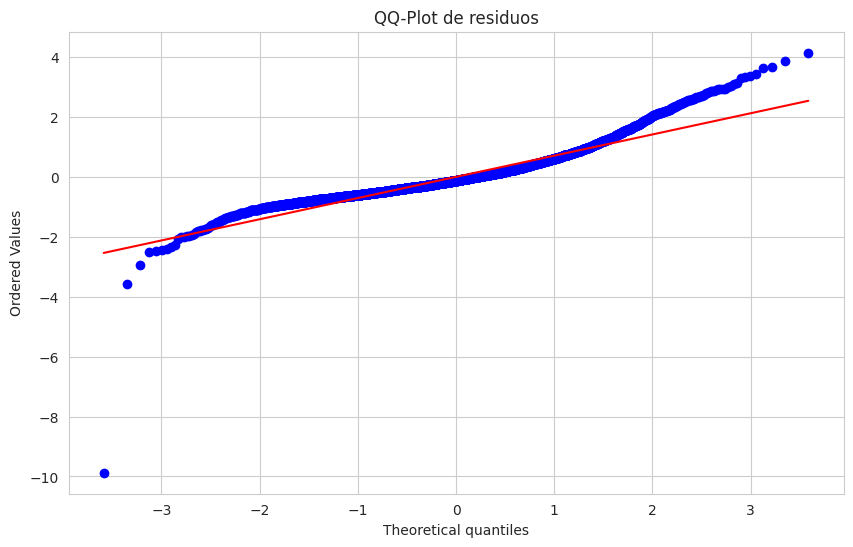

Test de Shapiro-Wilk: Estadístico = 0.902, p-valor = 0.0000
Test D’Agostino-Pearson: Estadístico = 912.412, p-valor = 0.0000
  ▸ Los residuos muestran desviaciones significativas de la normalidad (se rechaza H0).


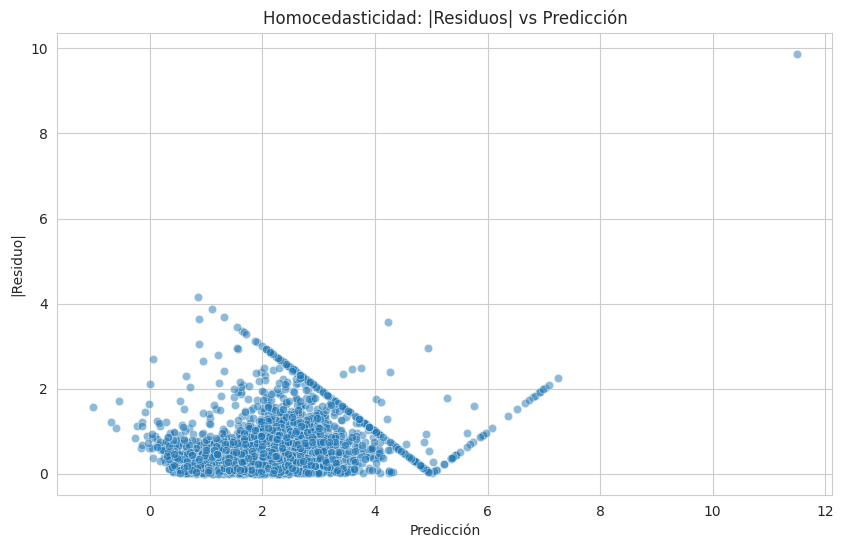

In [ ]:
# -----------------------------------------------------------
# REGRESIÓN LINEAL MÚLTIPLE CON SUPUESTOS Y TESTS COMPLETOS
# Dataset: California Housing (scikit-learn)
# Autor: Sergio Gevatschnaider
# Fecha: 2025-07-17
# -----------------------------------------------------------

# 1. Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score)
from scipy.stats import shapiro, normaltest, probplot

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# -----------------------------------------------------------
# 2. Carga y exploración del dataset
# -----------------------------------------------------------
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="MedHouseVal")

print(" Dimensión del dataset:", X.shape)
print("\n Descripción breve de las variables:")
display(X.describe().T)

# -----------------------------------------------------------
# 3. Análisis exploratorio rápido
# -----------------------------------------------------------
corr = X.join(y).corr()["MedHouseVal"].sort_values(ascending=False)
print("\n Correlación de cada feature con el precio medio de la vivienda:")
display(corr)

# Mapa de calor de correlaciones
plt.figure()
sns.heatmap(X.join(y).corr(), annot=False, cmap="coolwarm")
plt.title("Mapa de correlaciones")
plt.show()

# Dispersión de la variable más correlacionada
plt.figure()
sns.scatterplot(x=X["MedInc"], y=y, alpha=0.5)
plt.title("Ingreso medio vs Valor medio de vivienda")
plt.xlabel("MedInc (ingreso medio)")
plt.ylabel("MedHouseVal (valor medio)")
plt.show()

# -----------------------------------------------------------
# 4. División en entrenamiento y prueba
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------------------------
# 5. Entrenamiento del modelo de Regresión Lineal
# -----------------------------------------------------------
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# -----------------------------------------------------------
# 6. Predicciones y evaluación
# -----------------------------------------------------------
y_pred = modelo.predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("\n📊 Métricas en el conjunto de prueba:")
print(f"   ▸ R² ...............: {r2:.3f}")
print(f"   ▸ MAE ..............: {mae:.3f}")
print(f"   ▸ RMSE .............: {rmse:.3f}")
print(f"   ▸ MSE ..............: {mse:.3f}")

# -----------------------------------------------------------
# 7. Validación cruzada (10-fold)
# -----------------------------------------------------------
cv_scores = cross_val_score(modelo, X, y, cv=10, scoring="r2")
print("\n R² por fold de validación cruzada (10-fold):")
print(cv_scores)
print(f"   ▸ Promedio R² CV ...: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# -----------------------------------------------------------
# 8. Importancia de coeficientes (barplot)
# -----------------------------------------------------------
coef_series = pd.Series(modelo.coef_, index=X.columns).sort_values()
plt.figure()
coef_series.plot(kind="barh")
plt.title("Importancia relativa de los coeficientes")
plt.xlabel("Valor del coeficiente")
plt.tight_layout()
plt.show()

# -----------------------------------------------------------
# 9. Dispersión Predichos vs Reales
# -----------------------------------------------------------
plt.figure()
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         "r--", lw=2, label="Predicción perfecta")
plt.title("Predicción vs Valor Real")
plt.xlabel("Valor real (MedHouseVal)")
plt.ylabel("Predicción")
plt.legend()
plt.show()

# -----------------------------------------------------------
# 10. Gráfico de residuos
# -----------------------------------------------------------
residuos = y_test - y_pred

plt.figure()
sns.scatterplot(x=y_pred, y=residuos, alpha=0.5)
plt.axhline(0, linestyle="--", lw=2, color="r")
plt.title("Residuos vs Predicción")
plt.xlabel("Predicción")
plt.ylabel("Residuo")
plt.show()

# -----------------------------------------------------------
# 11. Test de normalidad de residuos
# -----------------------------------------------------------
plt.figure()
sns.histplot(residuos, kde=True, bins=40, color="#60a5fa")
plt.title("Distribución de residuos (histograma)")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.show()

plt.figure()
probplot(residuos, dist="norm", plot=plt)
plt.title("QQ-Plot de residuos")
plt.show()

# Test Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(residuos)
print(f"Test de Shapiro-Wilk: Estadístico = {shapiro_stat:.3f}, p-valor = {shapiro_p:.4f}")

# Test D’Agostino y Pearson (normaltest)
norm_stat, norm_p = normaltest(residuos)
print(f"Test D’Agostino-Pearson: Estadístico = {norm_stat:.3f}, p-valor = {norm_p:.4f}")

if shapiro_p > 0.05 and norm_p > 0.05:
    print("  ▸ Los residuos no difieren significativamente de la normalidad (no se rechaza H0).")
else:
    print("  ▸ Los residuos muestran desviaciones significativas de la normalidad (se rechaza H0).")

# -----------------------------------------------------------
# 12. Homocedasticidad (gráfico adicional)
# -----------------------------------------------------------
plt.figure()
sns.scatterplot(x=y_pred, y=np.abs(residuos), alpha=0.5)
plt.title("Homocedasticidad: |Residuos| vs Predicción")
plt.xlabel("Predicción")
plt.ylabel("|Residuo|")
plt.show()





INICIANDO ANÁLISIS PARA: Real (California Housing)

--- Resumen del Modelo OLS ---
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     9502.
Date:                Thu, 17 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:54:47   Log-Likelihood:                -25505.
No. Observations:               20640   AIC:                         5.102e+04
Df Residuals:                   20637   BIC:                         5.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

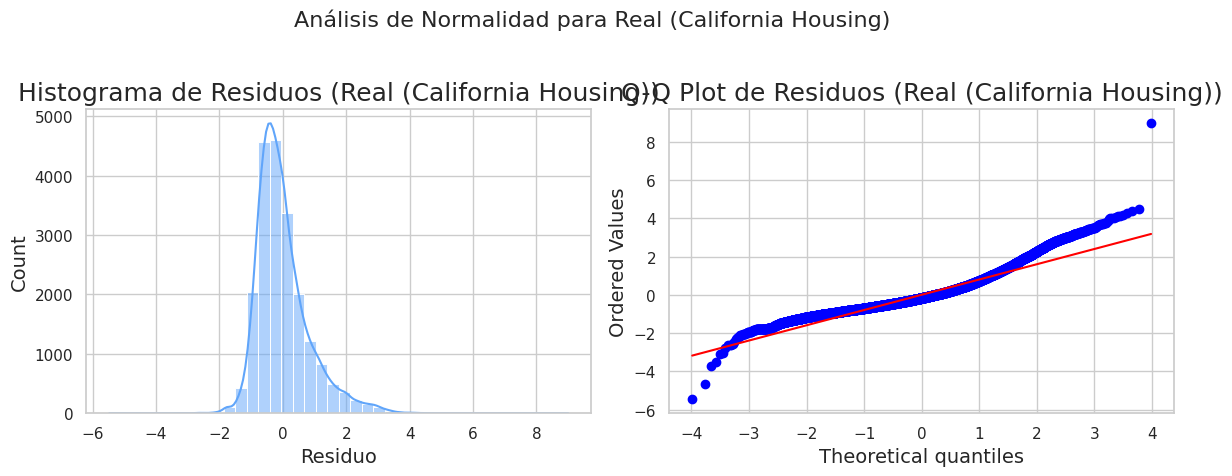


Resultados de los Tests Estadísticos de Normalidad:
  ▸ Test de Shapiro-Wilk: Estadístico=0.9179, p-valor=0.0000
  ▸ Test D'Agostino-Pearson: Estadístico=4804.1792, p-valor=0.0000
  ❌ Conclusión: Los residuos NO siguen una distribución normal (se rechaza H0).

--------------------------------------------------------------------------------

--- B. Test de Linealidad y Homocedasticidad ---


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


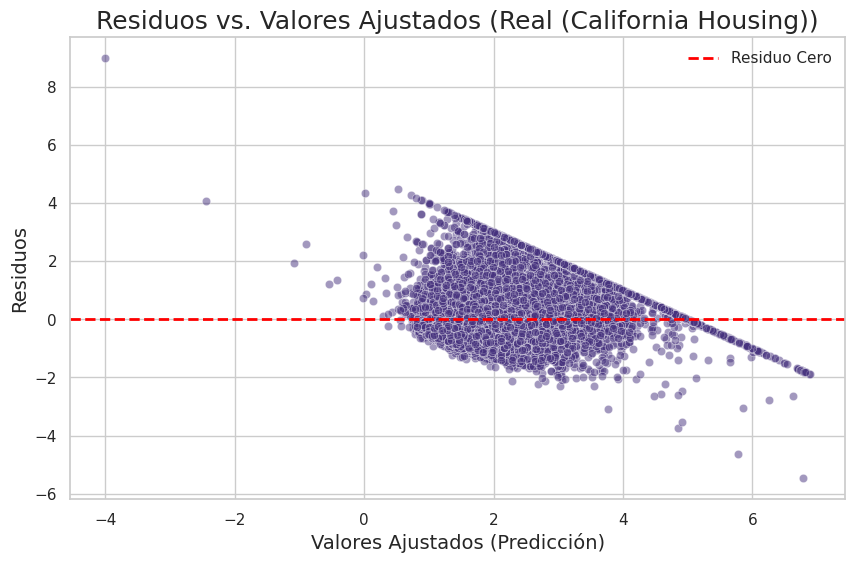

Interpretación del Gráfico:
  - Linealidad: Buscamos una nube de puntos sin patrones (ej. una curva).
  - Homocedasticidad: Buscamos que la dispersión vertical de los puntos sea constante a lo largo del eje X (sin forma de cono o abanico).

Resultados de los Tests Estadísticos de Linealidad:
  ▸ Test de Harvey-Collier: Estadístico T=8.0650, p-valor=0.0000
    ❌ Conclusión: La prueba sugiere que la relación NO es lineal (se rechaza H0).
  ▸ Test RESET de Ramsey: Estadístico F=124.2166, p-valor=0.0000
    ❌ Conclusión: El modelo podría estar mal especificado, posiblemente por no linealidad (se rechaza H0).

Resultados de los Tests Estadísticos de Homocedasticidad:
  ▸ Test de Breusch-Pagan: Estadístico LM=686.4694, p-valor=0.0000
    ❌ Conclusión: Se detecta heterocedasticidad (la varianza de los residuos no es constante).
  ▸ Test de White: Estadístico LM=2751.1532, p-valor=0.0000
    ❌ Conclusión: Se detecta heterocedasticidad.


INICIANDO ANÁLISIS PARA: Sintético (Ideal)

--- Resumen 

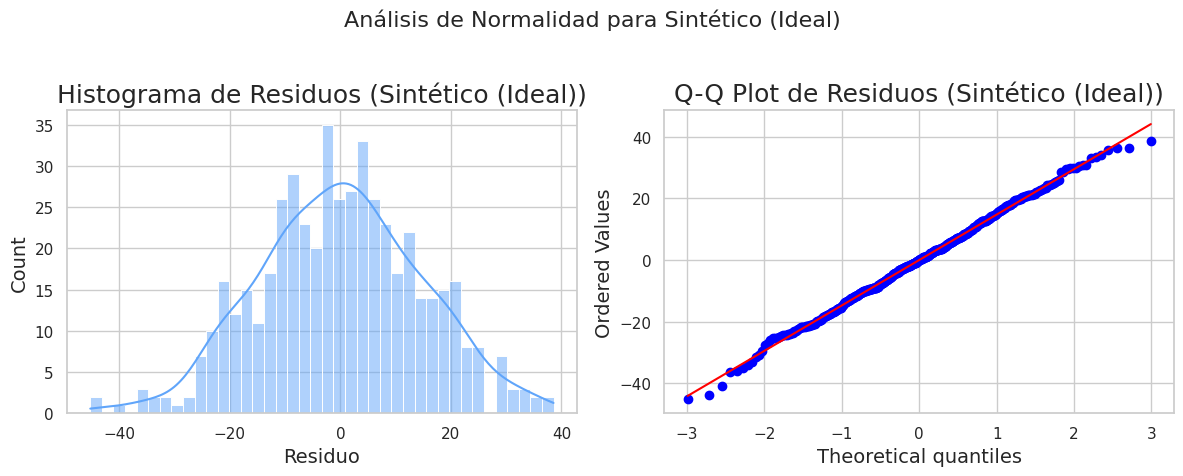


Resultados de los Tests Estadísticos de Normalidad:
  ▸ Test de Shapiro-Wilk: Estadístico=0.9976, p-valor=0.6989
  ▸ Test D'Agostino-Pearson: Estadístico=0.2297, p-valor=0.8915
  ✅ Conclusión: Los residuos parecen seguir una distribución normal (no se rechaza H0).

--------------------------------------------------------------------------------

--- B. Test de Linealidad y Homocedasticidad ---


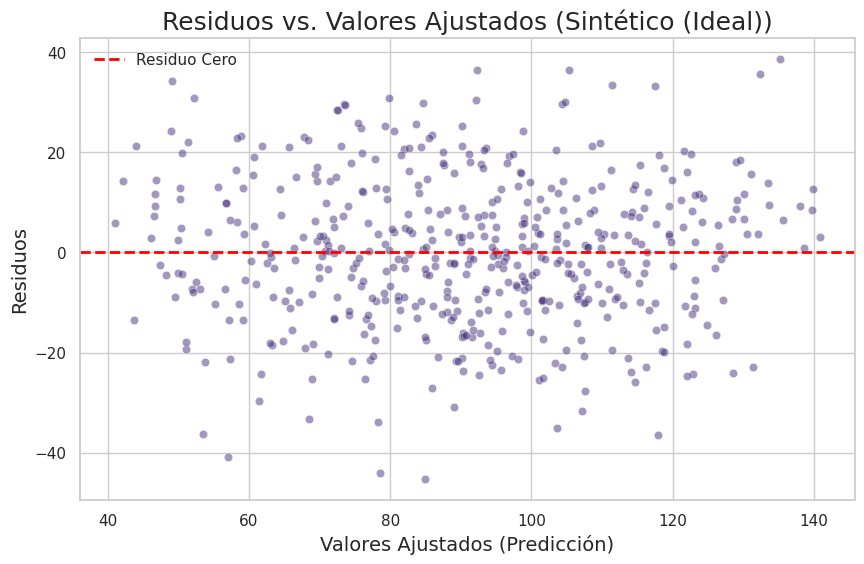

Interpretación del Gráfico:
  - Linealidad: Buscamos una nube de puntos sin patrones (ej. una curva).
  - Homocedasticidad: Buscamos que la dispersión vertical de los puntos sea constante a lo largo del eje X (sin forma de cono o abanico).

Resultados de los Tests Estadísticos de Linealidad:
  ▸ Test de Harvey-Collier: Estadístico T=-0.6735, p-valor=0.5009
    ✅ Conclusión: No hay evidencia para rechazar la linealidad del modelo (no se rechaza H0).
  ▸ Test RESET de Ramsey: Estadístico F=6.0218, p-valor=0.0145
    ❌ Conclusión: El modelo podría estar mal especificado, posiblemente por no linealidad (se rechaza H0).

Resultados de los Tests Estadísticos de Homocedasticidad:
  ▸ Test de Breusch-Pagan: Estadístico LM=1.3068, p-valor=0.5203
    ✅ Conclusión: No hay evidencia de heterocedasticidad (los residuos son homocedásticos).
  ▸ Test de White: Estadístico LM=2.2979, p-valor=0.8066
    ✅ Conclusión: No hay evidencia de heterocedasticidad.



In [ ]:
# -----------------------------------------------------------
# COMPARACIÓN DE DIAGNÓSTICOS DE REGRESIÓN LINEAL
# Caso 1: Dataset Real (California Housing) - No cumple supuestos
# Caso 2: Dataset Sintético - Cumple supuestos
# Autor: Sergio Gevatschnaider & Gemini
# Fecha: 2025-07-17
# -----------------------------------------------------------

# 1. Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from scipy.stats import shapiro, normaltest, probplot
from statsmodels.stats.diagnostic import (linear_harvey_collier, linear_reset,
                                          het_breuschpagan, het_white)

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# -----------------------------------------------------------
# 2. Función de Análisis Completo
# -----------------------------------------------------------
def analizar_diagnosticos_regresion(X, y, nombre_modelo=""):
    """
    Ajusta un modelo de regresión lineal usando statsmodels,
    realiza una batería completa de pruebas de diagnóstico y visualiza los resultados.
    """
    print("\n" + "="*80)
    print(f"INICIANDO ANÁLISIS PARA: {nombre_modelo}")
    print("="*80 + "\n")

    # Statsmodels requiere añadir una constante para el término de intercepción
    X_sm = sm.add_constant(X)

    # Ajuste del modelo de regresión lineal
    modelo = sm.OLS(y, X_sm).fit()
    residuos = modelo.resid
    valores_ajustados = modelo.fittedvalues

    print("--- Resumen del Modelo OLS ---")
    print(modelo.summary())
    print("\n" + "-"*80 + "\n")

    # --- A. ANÁLISIS DE NORMALIDAD DE RESIDUOS ---
    print("--- A. Test de Normalidad de los Residuos ---")
    # A1. Gráfico: Histograma + Densidad
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(residuos, kde=True, bins=40, color="#60a5fa")
    plt.title(f"Histograma de Residuos ({nombre_modelo})")
    plt.xlabel("Residuo")

    # A2. Gráfico: Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(residuos, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot de Residuos ({nombre_modelo})")
    plt.suptitle(f"Análisis de Normalidad para {nombre_modelo}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # A3. Tests Estadísticos de Normalidad
    print("\nResultados de los Tests Estadísticos de Normalidad:")
    # Shapiro-Wilk Test (H0: la muestra proviene de una distribución normal)
    shapiro_stat, shapiro_p = shapiro(residuos)
    print(f"  ▸ Test de Shapiro-Wilk: Estadístico={shapiro_stat:.4f}, p-valor={shapiro_p:.4f}")

    # D'Agostino & Pearson's Test (H0: la muestra proviene de una distribución normal)
    norm_stat, norm_p = normaltest(residuos)
    print(f"  ▸ Test D'Agostino-Pearson: Estadístico={norm_stat:.4f}, p-valor={norm_p:.4f}")

    if shapiro_p > 0.05 and norm_p > 0.05:
        print("  ✅ Conclusión: Los residuos parecen seguir una distribución normal (no se rechaza H0).")
    else:
        print("  ❌ Conclusión: Los residuos NO siguen una distribución normal (se rechaza H0).")
    print("\n" + "-"*80 + "\n")


    # --- B. ANÁLISIS DE LINEALIDAD Y HOMOCEDASTICIDAD ---
    print("--- B. Test de Linealidad y Homocedasticidad ---")
    # B1. Gráfico: Residuos vs. Valores Ajustados
    plt.figure()
    sns.scatterplot(x=valores_ajustados, y=residuos, alpha=0.5)
    plt.axhline(0, linestyle="--", lw=2, color="r", label="Residuo Cero")
    plt.title(f"Residuos vs. Valores Ajustados ({nombre_modelo})")
    plt.xlabel("Valores Ajustados (Predicción)")
    plt.ylabel("Residuos")
    plt.legend()
    plt.show()

    print("Interpretación del Gráfico:")
    print("  - Linealidad: Buscamos una nube de puntos sin patrones (ej. una curva).")
    print("  - Homocedasticidad: Buscamos que la dispersión vertical de los puntos sea constante a lo largo del eje X (sin forma de cono o abanico).")

    # B2. Tests Estadísticos de Linealidad
    print("\nResultados de los Tests Estadísticos de Linealidad:")
    # Harvey-Collier Test (H0: el modelo es lineal)
    try:
        hc_test = linear_harvey_collier(modelo)
        print(f"  ▸ Test de Harvey-Collier: Estadístico T={hc_test.statistic:.4f}, p-valor={hc_test.pvalue:.4f}")
        if hc_test.pvalue < 0.05:
            print("    ❌ Conclusión: La prueba sugiere que la relación NO es lineal (se rechaza H0).")
        else:
            print("    ✅ Conclusión: No hay evidencia para rechazar la linealidad del modelo (no se rechaza H0).")
    except Exception as e:
        print(f"  - No se pudo realizar el Test de Harvey-Collier: {e}")

    # Ramsey RESET Test (H0: el modelo está correctamente especificado, sin no-linealidades omitidas)
    reset_test = linear_reset(modelo, power=2, test_type='fitted', use_f=True)
    print(f"  ▸ Test RESET de Ramsey: Estadístico F={reset_test.fvalue:.4f}, p-valor={reset_test.pvalue:.4f}")
    if reset_test.pvalue < 0.05:
        print("    ❌ Conclusión: El modelo podría estar mal especificado, posiblemente por no linealidad (se rechaza H0).")
    else:
        print("    ✅ Conclusión: El modelo parece estar correctamente especificado (no se rechaza H0).")


    # B3. Tests Estadísticos de Homocedasticidad
    print("\nResultados de los Tests Estadísticos de Homocedasticidad:")
    # Breusch-Pagan Test (H0: los residuos son homocedásticos)
    bp_test = het_breuschpagan(residuos, modelo.model.exog)
    print(f"  ▸ Test de Breusch-Pagan: Estadístico LM={bp_test[0]:.4f}, p-valor={bp_test[1]:.4f}")
    if bp_test[1] < 0.05:
        print("    ❌ Conclusión: Se detecta heterocedasticidad (la varianza de los residuos no es constante).")
    else:
        print("    ✅ Conclusión: No hay evidencia de heterocedasticidad (los residuos son homocedásticos).")

    # White Test (H0: los residuos son homocedásticos)
    white_test = het_white(residuos, modelo.model.exog)
    print(f"  ▸ Test de White: Estadístico LM={white_test[0]:.4f}, p-valor={white_test[1]:.4f}")
    if white_test[1] < 0.05:
        print("    ❌ Conclusión: Se detecta heterocedasticidad.")
    else:
        print("    ✅ Conclusión: No hay evidencia de heterocedasticidad.")
    print("\n" + "="*80)


# -----------------------------------------------------------
# CASO 1: DATASET REAL (CALIFORNIA HOUSING)
# -----------------------------------------------------------
# Carga de datos
california = fetch_california_housing()
X_real = pd.DataFrame(california.data, columns=california.feature_names)
y_real = pd.Series(california.target, name="MedHouseVal")

# Se seleccionan solo las 2 variables más correlacionadas para simplificar la visualización
X_real_simple = X_real[['MedInc', 'AveRooms']]

# Ejecución del análisis
analizar_diagnosticos_regresion(X_real_simple, y_real, nombre_modelo="Real (California Housing)")


# -----------------------------------------------------------
# CASO 2: DATASET SINTÉTICO (IDEAL)
# -----------------------------------------------------------
# Generación de datos que cumplen los supuestos por diseño
np.random.seed(42)
n_samples = 500
X1_sintetico = np.random.uniform(0, 20, n_samples)
X2_sintetico = np.random.uniform(5, 15, n_samples)
# El error sigue una distribución normal con media 0
error_normal = np.random.normal(0, 15, n_samples)

# La relación es perfectamente lineal por construcción
y_sintetico = 10 + 3 * X1_sintetico + 5 * X2_sintetico + error_normal

X_sintetico = pd.DataFrame({'Feature_1': X1_sintetico, 'Feature_2': X2_sintetico})

# Ejecución del análisis
analizar_diagnosticos_regresion(X_sintetico, y_sintetico, nombre_modelo="Sintético (Ideal)")

--- Análisis para el Modelo: Lineal ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           1.56e-23
Time:                        20:50:08   Log-Likelihood:                -292.60
No. Observations:                 100   AIC:                             589.2
Df Residuals:                      98   BIC:                             594.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

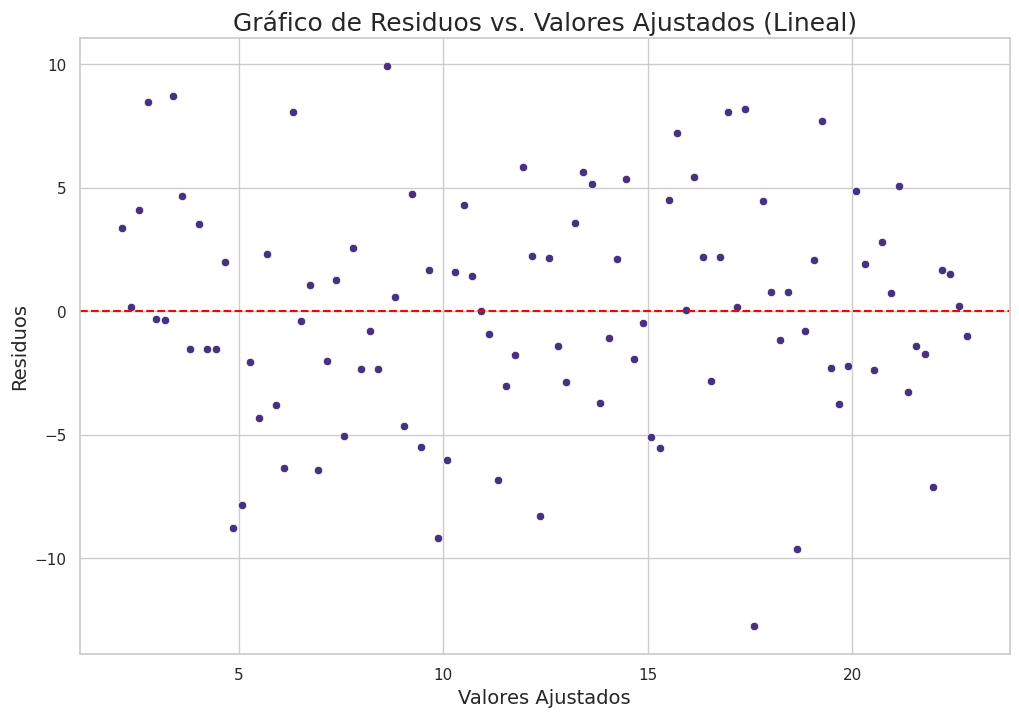


Interpretación del Gráfico de Residuos:
Un patrón aleatorio de puntos dispersos alrededor de la línea horizontal en 0 sugiere linealidad. [14] 
Cualquier patrón discernible (como una curva) indica un problema con el supuesto de linealidad. [21, 29]

Resultado del Test de Harvey-Collier:
  - Estadístico T: 1.5845
  - P-valor: 0.1164
  - Interpretación: No se rechaza la H0. El modelo es consistente con una relación lineal.

Resultado del Test RESET de Ramsey:
  - Estadístico F: 0.3711
  - P-valor: 0.5438
  - Interpretación: No se rechaza la H0. El modelo parece estar correctamente especificado. [17]

--- Pruebas de Homocedasticidad ---

Resultado del Test de Breusch-Pagan:
{'Estadístico LM': np.float64(0.2728976751265044), 'P-valor (LM)': np.float64(0.6013945776291403), 'Estadístico F': np.float64(0.26817155556446526), 'P-valor (F)': np.float64(0.6057280388642077)}
  - Interpretación: No se rechaza la H0. No hay evidencia de heterocedasticidad. [19]

Resultado del Test de White:
{'Estad

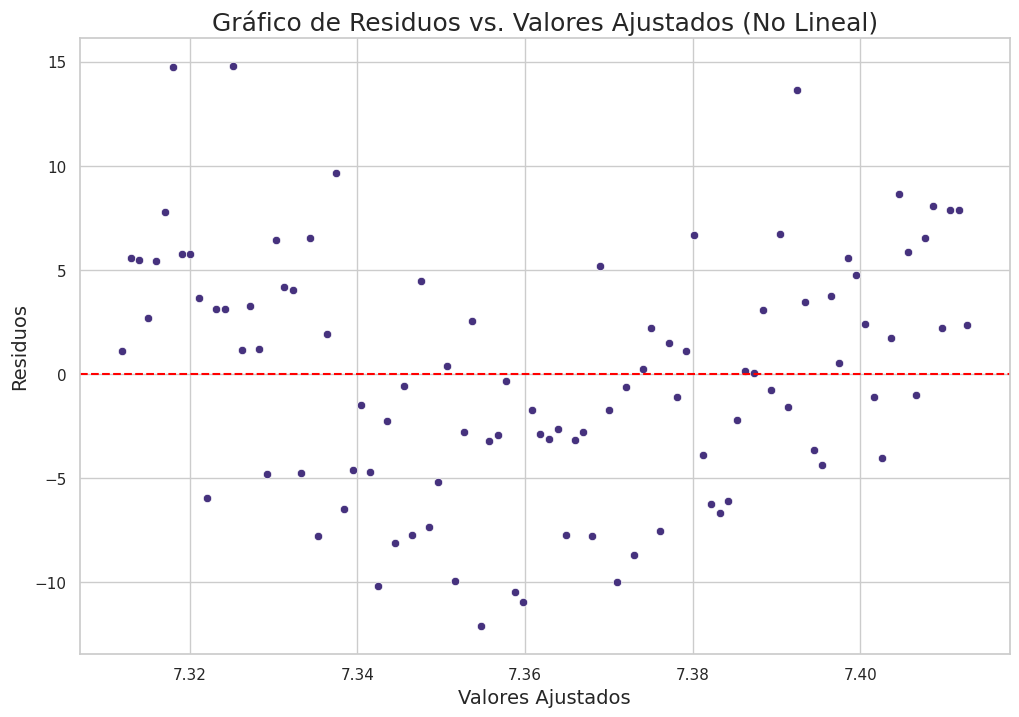


Interpretación del Gráfico de Residuos:
Un patrón aleatorio de puntos dispersos alrededor de la línea horizontal en 0 sugiere linealidad. [14] 
Cualquier patrón discernible (como una curva) indica un problema con el supuesto de linealidad. [21, 29]

Resultado del Test de Harvey-Collier:
  - Estadístico T: 4.0634
  - P-valor: 0.0001
  - Interpretación: Se rechaza la H0. La prueba sugiere que la relación NO es lineal. [11]

Resultado del Test RESET de Ramsey:
  - Estadístico F: 48.8490
  - P-valor: 0.0000
  - Interpretación: Se rechaza la H0. La prueba sugiere un error de especificación, posiblemente por no linealidad. [5, 9]

--- Pruebas de Homocedasticidad ---

Resultado del Test de Breusch-Pagan:
{'Estadístico LM': np.float64(1.5155448177775588), 'P-valor (LM)': np.float64(0.2182949420630797), 'Estadístico F': np.float64(1.5080896966672814), 'P-valor (F)': np.float64(0.22237211548994706)}
  - Interpretación: No se rechaza la H0. No hay evidencia de heterocedasticidad. [19]

Resultado

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_harvey_collier, linear_reset, het_breuschpagan, het_white
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Generación de Datos de Ejemplo ---
# Generaremos dos conjuntos de datos:
# - Uno con una relación lineal clara.
# - Uno con una relación no lineal (cuadrática) para ver cómo fallan las pruebas.

np.random.seed(42)
n_muestras = 100

# Datos con relación lineal
X_lineal = np.linspace(0, 10, n_muestras)
e_lineal = np.random.normal(0, 5, n_muestras)
y_lineal = 2 * X_lineal + 3 + e_lineal
df_lineal = pd.DataFrame({'X': X_lineal, 'y': y_lineal})
X_lineal_sm = sm.add_constant(df_lineal['X']) # Añadir constante para el intercepto

# Datos con relación no lineal (cuadrática)
X_no_lineal = np.linspace(0, 10, n_muestras)
e_no_lineal = np.random.normal(0, 5, n_muestras)
y_no_lineal = 0.5 * (X_no_lineal - 5)**2 + 3 + e_no_lineal
df_no_lineal = pd.DataFrame({'X': X_no_lineal, 'y': y_no_lineal})
X_no_lineal_sm = sm.add_constant(df_no_lineal['X']) # Añadir constante


# --- 2. Función para Realizar el Análisis y las Pruebas ---
def analizar_regresion_y_residuos(X, y, nombre_modelo=""):
    """
    Esta función ajusta un modelo de regresión lineal,
    realiza pruebas de diagnóstico en los residuos y muestra los resultados.
    """
    print(f"--- Análisis para el Modelo: {nombre_modelo} ---")

    # Ajuste del modelo de regresión lineal
    modelo = sm.OLS(y, X).fit()
    print(modelo.summary())

    residuos = modelo.resid
    valores_ajustados = modelo.fittedvalues

    # --- 3. Pruebas de Linealidad de Residuos ---

    # a) Prueba Visual: Gráfico de Residuos vs. Valores Ajustados
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=valores_ajustados, y=residuos)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Gráfico de Residuos vs. Valores Ajustados ({nombre_modelo})')
    plt.xlabel('Valores Ajustados')
    plt.ylabel('Residuos')
    plt.grid(True)
    plt.show()
    print("\nInterpretación del Gráfico de Residuos:")
    print("Un patrón aleatorio de puntos dispersos alrededor de la línea horizontal en 0 sugiere linealidad. [14] \nCualquier patrón discernible (como una curva) indica un problema con el supuesto de linealidad. [21, 29]")

    # b) Test de Harvey-Collier
    # H0: La relación es lineal.
    # H1: La relación no es lineal.
    try:
        hc_test = linear_harvey_collier(modelo)
        print(f"\nResultado del Test de Harvey-Collier:")
        print(f"  - Estadístico T: {hc_test.statistic:.4f}")
        print(f"  - P-valor: {hc_test.pvalue:.4f}")
        if hc_test.pvalue < 0.05:
            print("  - Interpretación: Se rechaza la H0. La prueba sugiere que la relación NO es lineal. [11]")
        else:
            print("  - Interpretación: No se rechaza la H0. El modelo es consistente con una relación lineal.")
    except Exception as e:
        print(f"\nNo se pudo realizar el Test de Harvey-Collier: {e}")


    # c) Test RESET de Ramsey
    # H0: El modelo está correctamente especificado (no hay variables omitidas no lineales).
    # H1: El modelo está mal especificado.
    reset_test = linear_reset(modelo, power=2, test_type='fitted', use_f=True)
    print(f"\nResultado del Test RESET de Ramsey:")
    print(f"  - Estadístico F: {reset_test.fvalue:.4f}")
    print(f"  - P-valor: {reset_test.pvalue:.4f}")
    if reset_test.pvalue < 0.05:
        print("  - Interpretación: Se rechaza la H0. La prueba sugiere un error de especificación, posiblemente por no linealidad. [5, 9]")
    else:
        print("  - Interpretación: No se rechaza la H0. El modelo parece estar correctamente especificado. [17]")


    # --- 4. Pruebas de Homocedasticidad (Varianza Constante de los Residuos) ---
    # Es una buena práctica realizarlas junto con las pruebas de linealidad.

    print("\n--- Pruebas de Homocedasticidad ---")
    # a) Test de Breusch-Pagan
    # H0: Los residuos son homocedásticos (varianza constante).
    # H1: Los residuos son heterocedásticos.
    bp_test = het_breuschpagan(residuos, modelo.model.exog)
    labels = ['Estadístico LM', 'P-valor (LM)', 'Estadístico F', 'P-valor (F)']
    print(f"\nResultado del Test de Breusch-Pagan:")
    print(dict(zip(labels, bp_test)))
    if bp_test[1] < 0.05:
        print("  - Interpretación: Se rechaza la H0. La prueba sugiere heterocedasticidad. [2, 3]")
    else:
        print("  - Interpretación: No se rechaza la H0. No hay evidencia de heterocedasticidad. [19]")

    # b) Test de White
    # H0: Los residuos son homocedásticos.
    # H1: Los residuos son heterocedásticos (puede detectar formas más complejas).
    white_test = het_white(residuos, modelo.model.exog)
    print(f"\nResultado del Test de White:")
    print(dict(zip(labels, white_test)))
    if white_test[1] < 0.05:
        print("  - Interpretación: Se rechaza la H0. La prueba sugiere heterocedasticidad. [1, 7]")
    else:
        print("  - Interpretación: No se rechaza la H0. No hay evidencia de heterocedasticidad.")
    print("\n" + "="*50 + "\n")


# --- 5. Ejecución del Análisis ---

# Análisis para el conjunto de datos con relación lineal
analizar_regresion_y_residuos(X_lineal_sm, df_lineal['y'], nombre_modelo="Lineal")

# Análisis para el conjunto de datos con relación no lineal
analizar_regresion_y_residuos(X_no_lineal_sm, df_no_lineal['y'], nombre_modelo="No Lineal")

In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html

# =========================================================
# 1. BLOQUES HTML ESTÁTICOS
# =========================================================

introduction_norm_entropy_html = r"""
<div class="content-block">
    <h2>El Principio de Máxima Entropía y la Distribución Normal</h2>
    <p>En la intersección de la estadística y la teoría de la información yace un principio de profunda elegancia: el <strong>Principio de Máxima Entropía</strong>. Este principio establece que, ante un conocimiento parcial sobre un sistema (expresado como restricciones, por ejemplo, una media y una varianza conocidas), la distribución de probabilidad que mejor representa el estado actual del conocimiento es aquella que maximiza la entropía.</p>
    <p>En otras palabras, debemos elegir la distribución que sea lo más "aleatoria" o "no informativa" posible sin contradecir la información que ya poseemos. Para una variable continua con media y varianza finitas, este principio nos lleva inequívocamente a una conclusión notable: la <strong>distribución normal</strong> es la que posee la máxima entropía.</p>
</div>
"""

conclusion_norm_entropy_html = r"""
<div class="content-block">
    <h2>Conclusión: La Normalidad como Suposición de Mínima Estructura</h2>
    <p>La conexión entre la distribución normal y la máxima entropía es uno de los conceptos más profundos y unificadores en la ciencia de datos. Revela que la omnipresencia de la normalidad en la modelización estadística no es una mera conveniencia matemática, sino una elección fundamentada en el principio de no asumir más información de la que se tiene.</p>
    <p>Cuando asumimos que los errores de un modelo son normales, estamos haciendo la suposición más conservadora posible: que cualquier variabilidad no explicada es puramente aleatoria y carece de estructura oculta. Comprender este vínculo permite a los analistas justificar sus elecciones de modelo con mayor rigor y evaluar las desviaciones de la normalidad no como un problema, sino como una señal de que puede haber información valiosa aún por descubrir en los datos.</p>
</div>
"""

# =========================================================
# 2. DATOS PARA TARJETAS DESPLEGABLES (CONTENIDO EXPERTO)
# =========================================================
max_entropy_cards_data = [
    {
        "titulo": r"1. Entropía Diferencial y el Teorema Fundamental",
        "contenido": r"""
            <h4>Entropía para Variables Continuas</h4>
            <p>A diferencia de las variables discretas, la incertidumbre en variables continuas se mide con la <strong>entropía diferencial</strong>. Para una variable aleatoria \(X\) con una función de densidad de probabilidad (PDF) \(f(x)\), se define como:</p>
            <div class="formula-block">$$ h(X) = - \int_{-\infty}^{\infty} f(x) \log_e(f(x)) \,dx $$</div>
            <p>La base del logaritmo es convencionalmente \(e\) (el número de Euler), por lo que la unidad de medida es el "nat". A diferencia de la entropía discreta, la entropía diferencial puede ser negativa.</p>

            <h4>El Teorema de Máxima Entropía</h4>
            <p>Este teorema establece formalmente que: <em>"De todas las distribuciones de probabilidad continuas con una media \(\mu\) y una varianza \(\sigma^2\) dadas, la distribución Normal \(\mathcal{N}(\mu, \sigma^2)\) es la que tiene la mayor entropía diferencial."</em></p>

            <h4>La Entropía de la Distribución Normal</h4>
            <p>La entropía diferencial de una variable aleatoria normal \(X \sim \mathcal{N}(\mu, \sigma^2)\) tiene una forma cerrada y elegante:</p>
            <div class="formula-block">$$ h(X) = \frac{1}{2} \log_e(2\pi e \sigma^2) $$</div>
            <p>De esta fórmula se desprenden dos observaciones clave:</p>
            <ul>
                <li>La entropía <strong>depende únicamente de la varianza \(\sigma^2\)</strong>. La media \(\mu\) (la ubicación de la distribución) no afecta su nivel de incertidumbre.</li>
                <li>La entropía es una <strong>función monótonamente creciente de la varianza</strong>. A medida que la distribución se vuelve más dispersa (mayor \(\sigma^2\)), su incertidumbre y, por tanto, su entropía, aumentan.</li>
            </ul>
        """
    },
    {
        "titulo": r"2. Implicaciones Profundas en la Modelización Estadística",
        "contenido": r"""
            <h4>La Justificación de los Residuos Normales</h4>
            <p>Una de las suposiciones más comunes en los modelos de regresión lineal es que los términos de error (residuos) siguen una distribución normal. El principio de máxima entropía ofrece la justificación más sólida para esta suposición:</p>
            <blockquote>Al asumir que los residuos son normales, estamos declarando implícitamente que, después de que nuestro modelo ha explicado toda la estructura que pudo, el error restante es lo más aleatorio e impredecible posible. Si los residuos siguieran cualquier otra distribución con la misma varianza, tendrían una entropía más baja, lo que implicaría que todavía existe alguna estructura o información predecible que nuestro modelo no ha capturado.</blockquote>
            <p>Por lo tanto, la prueba de normalidad de los residuos no es solo una comprobación técnica, sino una evaluación de si el modelo ha extraído con éxito toda la información sistemática de los datos.</p>

            <h4>Conexión con el Teorema del Límite Central (TLC)</h4>
            <p>El TLC establece que la suma de un gran número de variables aleatorias independientes y de idéntica distribución tenderá a una distribución normal, independientemente de la distribución original. Esto complementa la visión de la máxima entropía: si asumimos que el error de un modelo es la suma de innumerables pequeños efectos no observados e independientes, es natural que su distribución agregada tienda a la normalidad.</p>
        """
    },
    {
        "titulo": r"3. Aplicaciones en Machine Learning e Inteligencia Artificial",
        "contenido": r"""
            <p>Este principio no es meramente teórico; tiene aplicaciones directas en el diseño y la regularización de algoritmos de IA.</p>
            <div class="table-container">
                 <table>
                    <thead><tr><th>Área de Aplicación</th><th>Implementación del Principio de Máxima Entropía</th></tr></thead>
                    <tbody>
                        <tr>
                            <td><strong>Modelos Generativos (ej. VAEs)</strong></td>
                            <td>En los Autoencoders Variacionales (VAEs), el espacio latente a menudo se regulariza para que se aproxime a una distribución normal estándar (\(\mathcal{N}(0, 1)\)). Esto se logra minimizando la divergencia KL entre la distribución latente aprendida y la normal. Forzar esta "máxima incertidumbre" en el espacio latente ayuda a que sea más suave y estructurado, facilitando la generación de nuevas muestras.</td>
                        </tr>
                        <tr>
                            <td><strong>Aprendizaje por Refuerzo (RL)</strong></td>
                            <td>Algoritmos modernos como Soft Actor-Critic (SAC) incorporan una "regularización por entropía". Añaden la entropía de la política del agente (su estrategia de acción) a la función objetivo. Esto incentiva al agente a mantener sus acciones tan aleatorias como sea posible mientras cumple con la tarea, lo que mejora drásticamente la exploración y evita la convergencia prematura a soluciones subóptimas.</td>
                        </tr>
                        <tr>
                            <td><strong>Estimación de Densidad</strong></td>
                            <td>Los modelos de Máxima Entropía (MaxEnt), también conocidos como regresión logística multinomial, construyen un modelo de probabilidad que es consistente con un conjunto de restricciones derivadas de los datos, pero que por lo demás es lo más uniforme (máxima entropía) posible.</td>
                        </tr>
                        <tr>
                            <td><strong>Teoría de la Información</strong></td>
                            <td>En la comunicación a través de un canal con una potencia de ruido fija, el ruido gaussiano (normal) es el que más degrada la señal, ya que su máxima entropía lo hace el más difícil de filtrar. Esto establece un límite fundamental para la capacidad del canal (Teorema de Shannon-Hartley).</td>
                        </tr>
                    </tbody>
                </table>
            </div>
        """
    }
]

# =========================================================
# 3. GENERADOR DE TARJETAS
# =========================================================
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_html = seccion['titulo']
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_html}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

contenido_dinamico_html = generar_tarjetas_definiciones(max_entropy_cards_data)

# =========================================================
# 4. PLANTILLA GLOBAL PROFESIONAL
# =========================================================
plantilla_profesional = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <script>
    window.MathJax = {{
      tex: {{
        inlineMath: [['$', '$'], ['\\(', '\\)']],
        displayMath: [['$$', '$$'], ['\\[', '\\]']],
        processEscapes: true,
        processEnvironments: true
      }},
      svg: {{
        fontCache: 'global'
      }}
    }};
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #2c3e50 0%, #4ca1af 100%);
      --bg-secondary: rgba(255, 255, 255, 0.92);
      --bg-tertiary: rgba(245, 249, 250, 0.95);
      --text-primary: #1f2d3d;
      --text-secondary: #3c4858;
      --text-light: #ffffff;
      --accent-primary: #4ca1af;
      --accent-secondary: #2c7a7b;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(224, 234, 235, 0.9);
      --shadow-card: 0 15px 35px rgba(45, 55, 72, 0.1);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 100%);
      --bg-secondary: rgba(17, 24, 39, 0.85);
      --bg-tertiary: rgba(31, 41, 55, 0.8);
      --text-primary: #e5e7eb;
      --text-secondary: #9ca3af;
      --accent-primary: #5eead4;
      --accent-secondary: #2dd4bf;
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.2);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.4);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.4; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; text-shadow: 0 0 30px rgba(255,255,255,0.3); margin-bottom: 1rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .content-block {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); padding: 2rem; margin-bottom: 2rem; }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1.5rem; border-bottom: 2px solid var(--accent-primary); padding-bottom: 0.5rem; }}
    .content-block p, .content-block li {{ color: var(--text-secondary); margin-bottom: 1rem; }}
    .content-block ul {{ list-style-type: '→ '; padding-left: 20px; }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.4rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent-primary); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.8s cubic-bezier(0.25, 0.8, 0.25, 1), padding 1.8s cubic-bezier(0.25, 0.8, 0.25, 1); background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 1rem; font-size: 1.2rem; border-left: 4px solid var(--accent-primary); padding-left: 1rem; }}
    .topic-content h4:first-child {{ margin-top: 0; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content ol li::marker, .topic-content ul li::marker {{ font-weight: bold; color: var(--accent-primary); }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{ border-left: 4px solid var(--accent-secondary); padding-left: 1.5rem; margin: 1.5rem 0; font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; padding: 1rem 1.5rem; }}
    .formula-block {{ padding: 1.5rem; background: rgba(0, 0, 0, 0.1); border-radius: 10px; text-align: center; overflow-x: auto; margin: 1.5rem 0; color: var(--text-primary); border: 1px solid var(--border-color); }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; border: 1px solid var(--border-color); border-radius: 10px; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 14px 18px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; border-top: 0; }}
    .MathJax {{ color: var(--text-primary) !important; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    {introduction_html}
    <div class="lesson-container">
        {dynamic_content_html}
    </div>
    {conclusion_html}
    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>
  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}
        const storedTheme = localStorage.getItem('theme');
        setTheme(storedTheme || 'dark');

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
                if (window.MathJax && card.classList.contains('open')) {{
                    window.MathJax.typesetPromise([card]).catch(err => console.log('MathJax typeset error:', err));
                }}
            }});
        }});

        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                p.style.opacity = 0.6;
                container.appendChild(p);
            }}
        }}

        window.addEventListener('load', () => {{
            if (window.MathJax) {{
                window.MathJax.typesetPromise().catch(err => console.log('Initial MathJax error:', err));
            }}
        }});
    }})();
  </script>
</body>
</html>
"""

# =========================================================
# 5. RENDER FINAL
# =========================================================
final_html = plantilla_profesional.format(
    main_title="Entropía Máxima y la Distribución Normal",
    introduction_html=introduction_norm_entropy_html,
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_norm_entropy_html,
    footer_text="Material elaborado por prof. Sergio Gevatschnaider"
)

display(HTML(final_html))

Área de Aplicación,Implementación del Principio de Máxima Entropía
Modelos Generativos (ej. VAEs),"En los Autoencoders Variacionales (VAEs), el espacio latente a menudo se regulariza para que se aproxime a una distribución normal estándar (\(\mathcal{N}(0, 1)\)). Esto se logra minimizando la divergencia KL entre la distribución latente aprendida y la normal. Forzar esta ""máxima incertidumbre"" en el espacio latente ayuda a que sea más suave y estructurado, facilitando la generación de nuevas muestras."
Aprendizaje por Refuerzo (RL),"Algoritmos modernos como Soft Actor-Critic (SAC) incorporan una ""regularización por entropía"". Añaden la entropía de la política del agente (su estrategia de acción) a la función objetivo. Esto incentiva al agente a mantener sus acciones tan aleatorias como sea posible mientras cumple con la tarea, lo que mejora drásticamente la exploración y evita la convergencia prematura a soluciones subóptimas."
Estimación de Densidad,"Los modelos de Máxima Entropía (MaxEnt), también conocidos como regresión logística multinomial, construyen un modelo de probabilidad que es consistente con un conjunto de restricciones derivadas de los datos, pero que por lo demás es lo más uniforme (máxima entropía) posible."
Teoría de la Información,"En la comunicación a través de un canal con una potencia de ruido fija, el ruido gaussiano (normal) es el que más degrada la señal, ya que su máxima entropía lo hace el más difícil de filtrar. Esto establece un límite fundamental para la capacidad del canal (Teorema de Shannon-Hartley)."


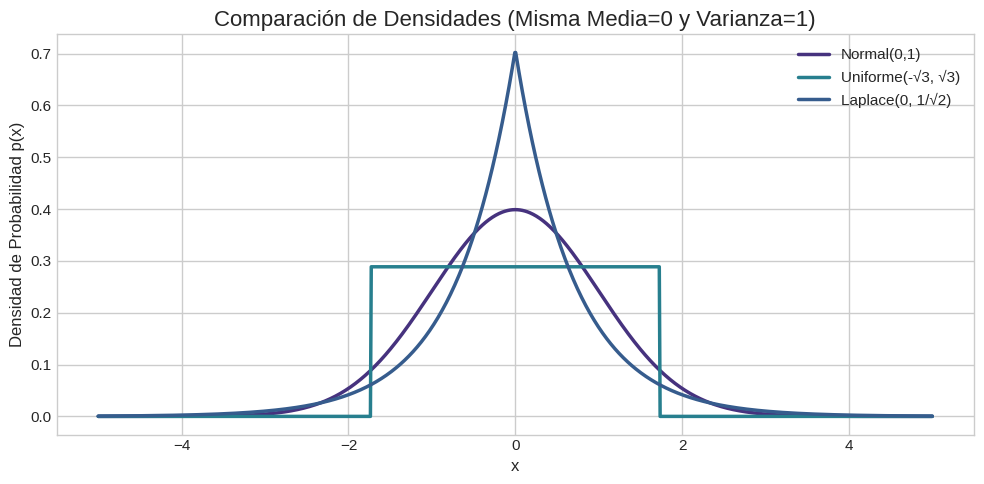

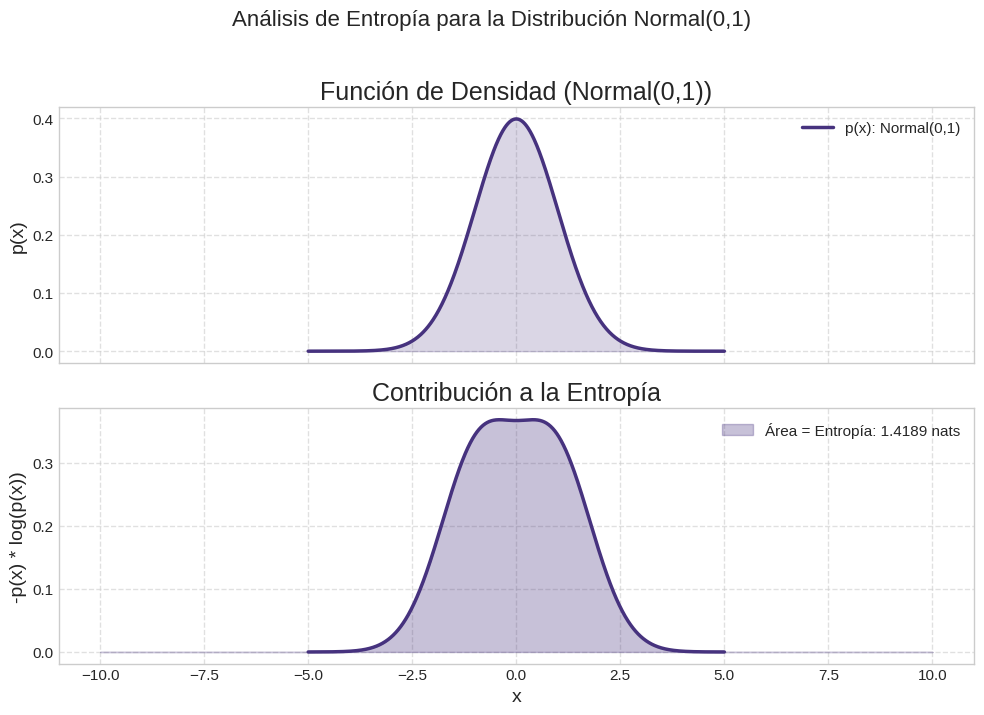

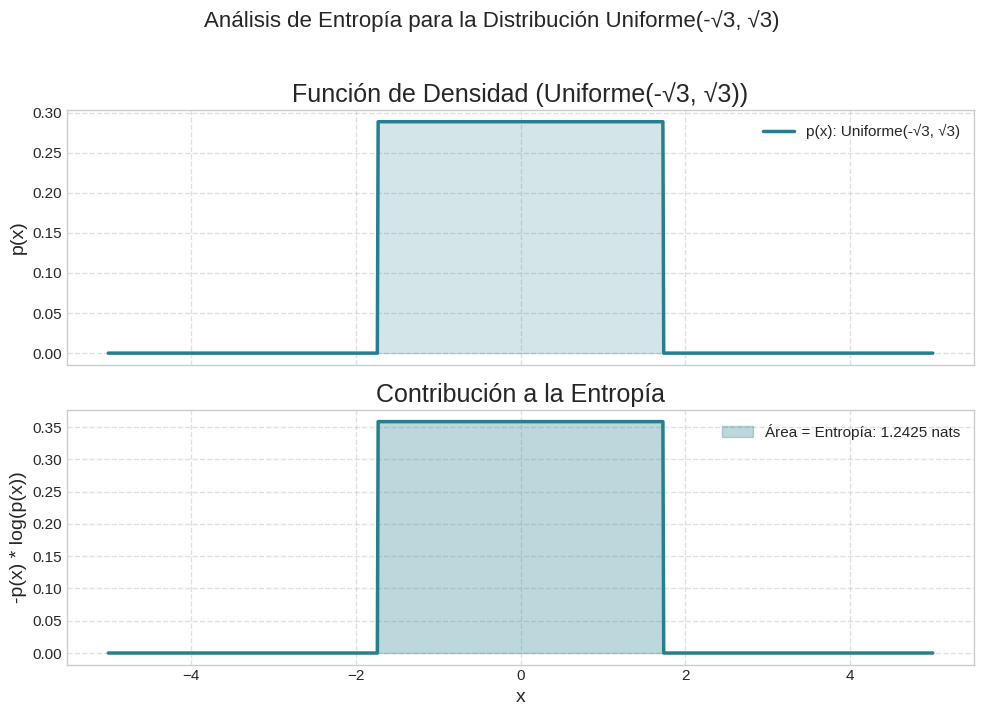

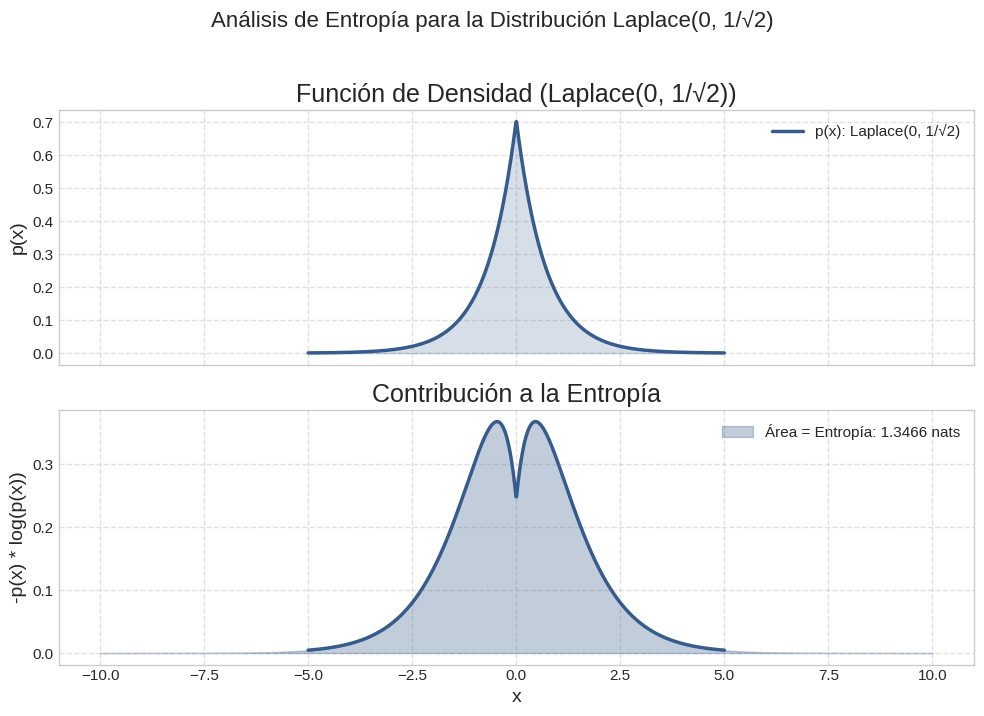

Resultados de la Entropía Diferencial (en nats, base e)
La entropía mide la 'incertidumbre' o 'sorpresa' de una variable aleatoria.
Para una varianza fija, la distribución Normal es la que maximiza la entropía.

     Distribución  Entropía Calculada (nats)  Entropía Teórica (nats)
      Normal(0,1)                   1.418939                 1.418939
Uniforme(-√3, √3)                   1.242453                 1.242453
 Laplace(0, 1/√2)                   1.346562                 1.346574


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, laplace
from scipy.integrate import quad
import pandas as pd

# --- Funciones para Cálculo y Graficación ---

def calcular_entropia_diferencial(pdf, support):
    """
    Calcula la entropía diferencial de una función de densidad de probabilidad (pdf).
    La entropía diferencial H(X) se define como: H(X) = -∫ p(x) * log(p(x)) dx
    """
    # El término 1e-12 evita errores de log(0) donde la densidad es nula.
    integrando = lambda x: -pdf(x) * np.log(pdf(x) + 1e-12)
    entropia, _ = quad(integrando, support[0], support[1], limit=200)
    return entropia

def graficar_distribucion_y_entropia(ax, x, pdf, h_x, title, color, support):
    """
    Función auxiliar para graficar la densidad y su contribución a la entropía.
    """
    # Gráfico de la función de densidad p(x)
    ax[0].plot(x, pdf(x), label=f'p(x): {title}', color=color, lw=2.5)
    ax[0].fill_between(x, pdf(x), color=color, alpha=0.2)
    ax[0].set_title(f"Función de Densidad ({title})")
    ax[0].set_ylabel("p(x)")
    ax[0].legend()
    ax[0].grid(linestyle='--', alpha=0.6)

    # Gráfico de la contribución a la entropía h(x) = -p(x) * log(p(x))
    ax[1].plot(x, h_x(x), color=color, lw=2.5)
    # Rellenamos el área bajo la curva h(x) que representa la entropía
    x_fill = np.linspace(support[0], support[1], 500)
    ax[1].fill_between(x_fill, h_x(x_fill), color=color, alpha=0.3, label=f'Área = Entropía: {calcular_entropia_diferencial(pdf, support):.4f} nats')
    ax[1].set_title("Contribución a la Entropía")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("-p(x) * log(p(x))")
    ax[1].legend()
    ax[1].grid(linestyle='--', alpha=0.6)

# --- Definición de las Distribuciones ---
# Se eligen parámetros para que todas tengan media 0 y varianza 1.

# 1. Distribución Normal
# Media = 0, Varianza = 1
mu_norm, sigma_norm = 0, 1
pdf_norm = lambda x: norm.pdf(x, loc=mu_norm, scale=sigma_norm)
support_norm = (-10, 10)

# 2. Distribución Uniforme
# Para varianza 1, el ancho debe ser sqrt(12). Centrada en 0.
ancho = np.sqrt(12)
a_unif, b_unif = -ancho / 2, ancho / 2
pdf_unif = lambda x: uniform.pdf(x, loc=a_unif, scale=(b_unif - a_unif))
support_unif = (a_unif, b_unif)

# 3. Distribución de Laplace
# Para varianza 1, el parámetro de escala 'b' debe ser sqrt(0.5)
mu_laplace, b_laplace = 0, np.sqrt(0.5)
pdf_laplace = lambda x: laplace.pdf(x, loc=mu_laplace, scale=b_laplace)
support_laplace = (-10, 10)

# --- Cálculo de la Entropía ---

distribuciones = {
    "Normal(0,1)": {"pdf": pdf_norm, "support": support_norm, "color": "C0"},
    "Uniforme(-√3, √3)": {"pdf": pdf_unif, "support": support_unif, "color": "C2"},
    "Laplace(0, 1/√2)": {"pdf": pdf_laplace, "support": support_laplace, "color": "C1"}
}

resultados = []
for nombre, params in distribuciones.items():
    entropia_num = calcular_entropia_diferencial(params["pdf"], params["support"])
    # Fórmula teórica para la entropía (si se conoce)
    if "Normal" in nombre:
        entropia_teorica = 0.5 * np.log(2 * np.pi * np.e * sigma_norm**2)
    elif "Uniforme" in nombre:
        entropia_teorica = np.log(b_unif - a_unif)
    elif "Laplace" in nombre:
        entropia_teorica = 1 + np.log(2 * b_laplace)
    else:
        entropia_teorica = None

    resultados.append({
        "Distribución": nombre,
        "Entropía Calculada (nats)": entropia_num,
        "Entropía Teórica (nats)": entropia_teorica
    })

# --- Visualización ---

# Rango para graficar
x = np.linspace(-5, 5, 1000)

# Gráfico Comparativo de Densidades
plt.style.use('seaborn-v0_8-whitegrid')
fig1, ax1 = plt.subplots(figsize=(10, 5))

for nombre, params in distribuciones.items():
    ax1.plot(x, params["pdf"](x), label=nombre, lw=2.5, color=params["color"])

ax1.set_title("Comparación de Densidades (Misma Media=0 y Varianza=1)", fontsize=16)
ax1.set_xlabel("x", fontsize=12)
ax1.set_ylabel("Densidad de Probabilidad p(x)", fontsize=12)
ax1.legend()
plt.tight_layout()
plt.show()


# Gráficos Individuales de Entropía
for nombre, params in distribuciones.items():
    fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
    fig.suptitle(f"Análisis de Entropía para la Distribución {nombre}", fontsize=16, y=1.02)

    h_x = lambda x: -params["pdf"](x) * np.log(params["pdf"](x) + 1e-12)

    graficar_distribucion_y_entropia(axes, x, params["pdf"], h_x, nombre, params["color"], params["support"])

    plt.tight_layout()
    plt.show()


# --- Mostrar Resultados en una Tabla ---
df_resultados = pd.DataFrame(resultados)
print("Resultados de la Entropía Diferencial (en nats, base e)")
print("La entropía mide la 'incertidumbre' o 'sorpresa' de una variable aleatoria.")
print("Para una varianza fija, la distribución Normal es la que maximiza la entropía.\n")
print(df_resultados.to_string(index=False))